In [23]:
import os
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

path = os.path.abspath('')
filename = ('1k_results.csv')
filepath = os.path.join(path, "results", filename)
print(filepath)

data = pd.read_csv(filepath)
data.drop(labels=['filename', 'area_buildable', 'carbon', 'kgCO2e'], axis=1, inplace=True)
data.head()
# data.isnull().sum()

X, y = data.iloc[:,:-1], data.iloc[:,-1]

data_dmatrix = xgb.DMatrix(data=X,label=y)
data

/Users/preston/Documents/GitHub/msdc-thesis/tool/results/1k_results.csv


,site,size,footprint,height,num_stories,num_adiabatic,inf_rate,orientation,WWR,frame,...,setback,rear_setback,side_setback,structure_setback,assembly_r,area_buildable,surf_area,volume,surf_vol_ratio,EUI
0,3,200,200,10,1,1,0.00059,1,0.1,3,...,1,0,5,5,7.351032,2225.954944,967.188914,2000,0.483594,130.214
1,3,200,200,10,1,1,0.00015,1,0.1,3,...,1,0,5,5,7.351032,2225.954944,967.188914,2000,0.483594,130.214
2,3,200,200,10,1,1,0.00059,1,0.1,3,...,0,5,5,5,7.351032,1972.217303,970.726696,2000,0.485363,130.639
3,3,200,200,10,1,1,0.00015,1,0.1,3,...,0,5,5,5,7.351032,1972.217303,970.726696,2000,0.485363,130.639
4,0,200,200,10,1,1,0.00059,1,0.1,3,...,0,0,5,5,7.351032,810.158325,965.841871,2000,0.482921,131.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,600,300,20,2,2,0.00015,1,0.6,0,...,1,0,5,5,1.890231,1170.409731,2074.616975,6000,0.345769,135.332
995,2,600,300,20,2,2,0.00059,1,0.6,0,...,0,0,5,5,1.890231,1619.025972,2076.312169,6000,0.346052,135.364
996,2,600,300,20,2,2,0.00059,1,0.6,0,...,1,0,5,5,1.890231,1619.025972,2076.312169,6000,0.346052,135.364
997,2,600,300,20,2,2,0.00015,1,0.6,0,...,0,0,5,5,1.890231,1619.025972,2076.312169,6000,0.346052,135.364


In [26]:
from sklearn.model_selection import train_test_split

# train xgboost model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

params = {
            'objective':'reg:squarederror',
            'colsample_bytree':0.3,
            'learning_rate':0.1,
            'max_depth':5,
            'alpha':10,
            'n_estimators':10
}

xg_reg = xgb.XGBRegressor(**params)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
# test = xg_reg.predict()
X_test


RMSE: 47.461464


,site,size,footprint,height,num_stories,num_adiabatic,inf_rate,orientation,WWR,frame,...,cellulose_t,setback,rear_setback,side_setback,structure_setback,assembly_r,area_buildable,surf_area,volume,surf_vol_ratio
131,2,200,200,10,1,1,0.00059,1,0.2,2,...,7.25,1,0,5,5,4.937547,1619.025972,1002.701919,2000,0.501351
203,2,200,200,10,1,1,0.00059,1,0.3,3,...,9.25,0,0,5,5,6.118260,1619.025972,1002.701919,2000,0.501351
50,1,200,200,10,1,1,0.00059,1,0.1,3,...,9.25,1,0,5,5,6.118260,1170.409731,1002.009859,2000,0.501005
584,3,600,300,20,2,2,0.00015,1,0.2,1,...,5.50,1,0,5,5,3.904422,2225.954944,1989.323426,6000,0.331554
138,1,200,200,10,1,1,0.00059,1,0.1,0,...,3.50,0,5,5,5,2.723708,1050.646485,991.765534,2000,0.495883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,200,200,10,1,1,0.00059,1,0.2,2,...,7.25,1,0,5,5,4.937547,810.158325,965.841871,2000,0.482921
177,3,200,200,10,1,1,0.00015,1,0.1,0,...,0.00,1,0,5,5,1.890231,2225.954944,967.188914,2000,0.483594
476,3,200,200,10,1,1,0.00015,1,0.6,0,...,0.00,0,5,5,5,1.890231,1972.217303,970.726696,2000,0.485363
210,1,200,200,10,1,1,0.00015,1,0.3,2,...,7.25,0,5,5,5,4.937547,1050.646485,991.765534,2000,0.495883


In [ ]:
# k-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

# cv_results.head()

model = xgb.XGBRegressor()
parameters = {"max_depth": range(3, 50,1), "gamma": range(0,20,1),"lambda": range(0,1,.1)}
randomized_search = RandomizedSearchCV(model, parameters, n_iter=20, scoring="neg_mean_squared_error", cv=3)


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
# print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

49    3.355807
Name: test-rmse-mean, dtype: float64


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

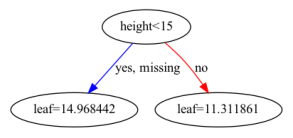

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50,10]
plt.show()

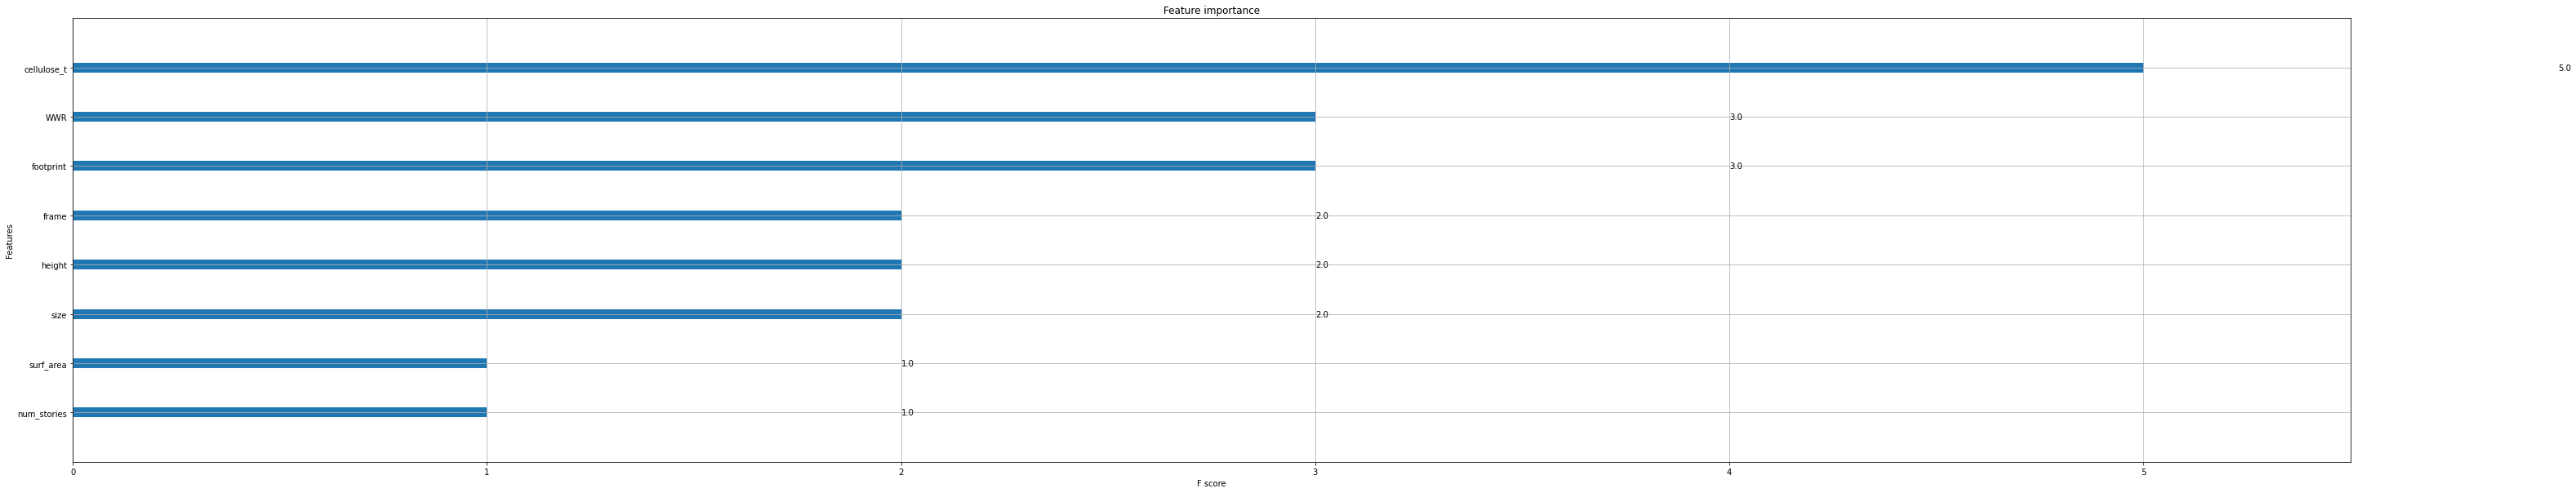

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()
